This notebook contains the complete workflow for the Prediction of Electric Vehicle Battery Degradation Using Sensor and Usage Data. It includes:
* Data loading and preprocessing
* Exploratory visualizations (Histogram, Correlation Heatmap)
* Model training and evaluation (Linear Regression, Random Forest, XGBoost)
* Performance comparison across models using MAE, RMSE, and R²
* Predicted vs Actual visualization for the best modell

In [1]:
# Importing all required libraries and modules
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
# Loading Dataset

df = pd.read_csv("EV_Battery_Dataset__Simulated_.csv")
df.head()


,cycle_count,temperature,voltage,current,depth_of_discharge,soh,cluster
0,1,32.483571,3.839936,1.162411,0.854992,0.997689,0
1,2,29.308678,3.792463,1.427741,0.986854,0.985967,0
2,3,33.238443,3.705963,1.103790,0.407737,0.992638,1
3,4,37.615149,3.635306,1.346019,0.975779,1.002124,2
4,5,28.829233,3.769822,0.553193,0.544987,0.994928,0


Exploratory Data Analysis
visualizing the distribution of the target variable and the correlation between numerical features.

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


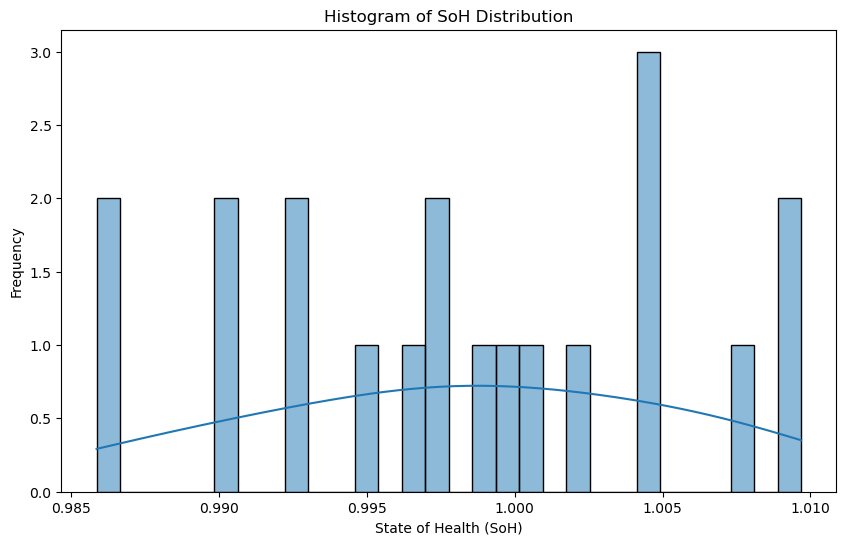

In [4]:
# Histogram of SoH
plt.figure(figsize=(10, 6))
sns.histplot(df['soh'], bins=30, kde=True)
plt.title('Histogram of SoH Distribution')
plt.xlabel('State of Health (SoH)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


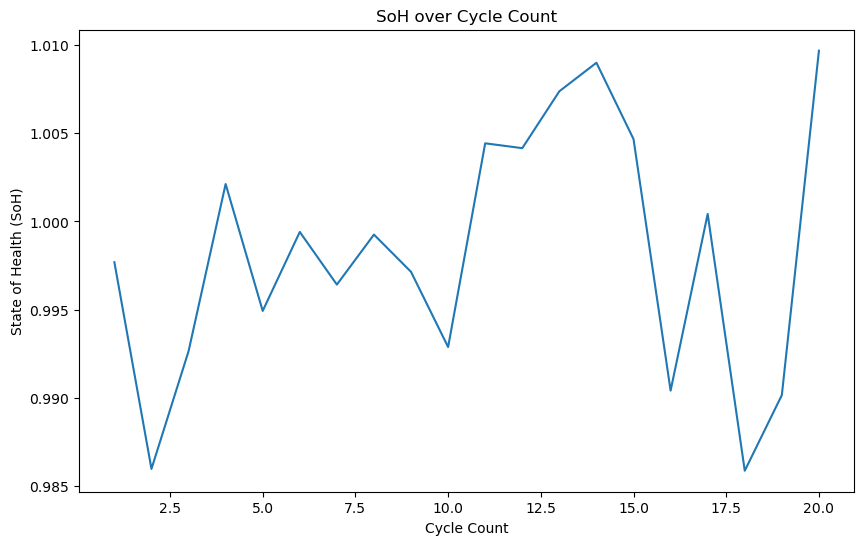

In [8]:
# SoH over Cycle Count
plt.figure(figsize=(10, 6))
sns.lineplot(x='cycle_count', y='soh', data=df)
plt.title('SoH over Cycle Count')
plt.xlabel('Cycle Count')
plt.ylabel('State of Health (SoH)')
plt.show()

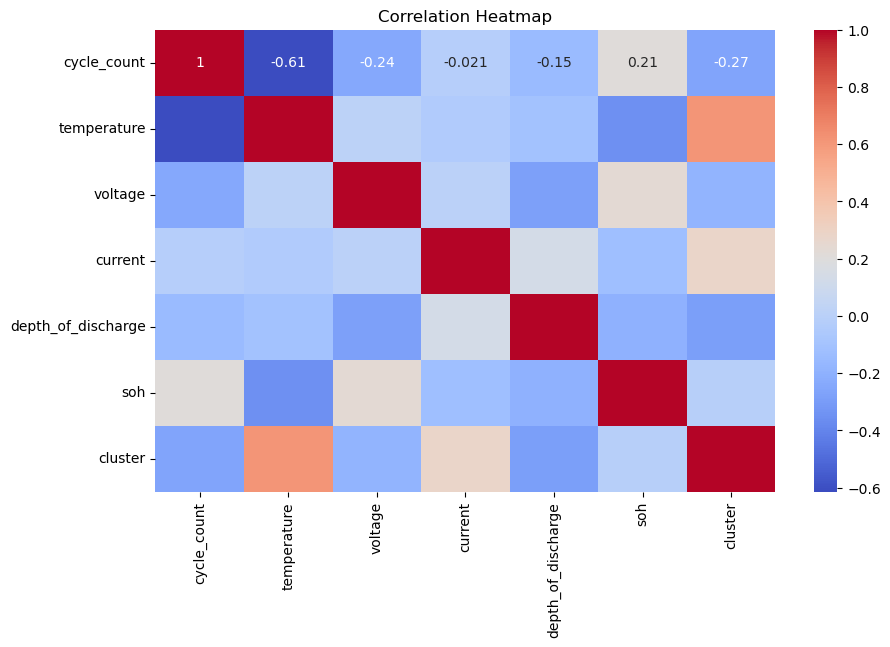

In [10]:
# Calculating correlation matrix
correlation_matrix = df.corr()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

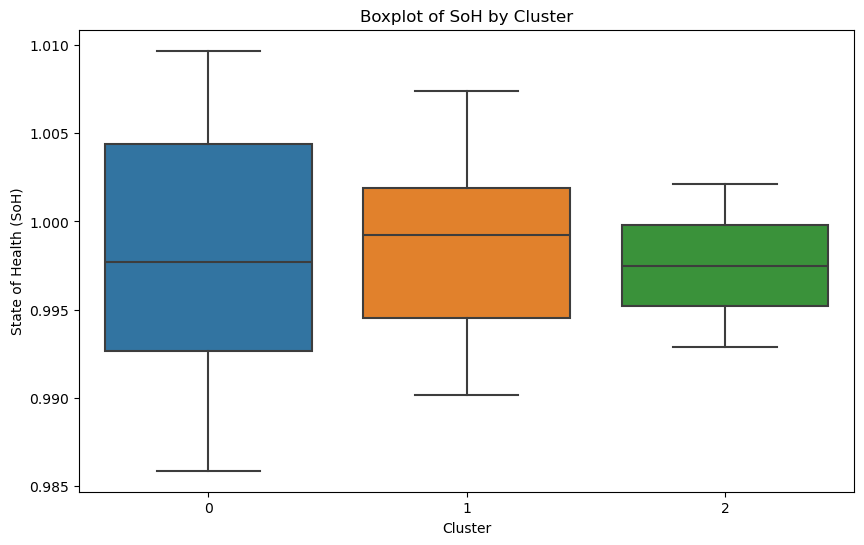

In [12]:
# Boxplot of SoH by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='soh', data=df)
plt.title('Boxplot of SoH by Cluster')
plt.xlabel('Cluster')
plt.ylabel('State of Health (SoH)')
plt.show()

Model Training and Evaluation splitting the data into training and testing sets, normalizing features, and evaluating three regression models:
* Linear Regression
* Random Forest Regressor
* XGBoost Regressor

Using MAE, RMSE, and R² as performance metrics.

In [13]:
# Pre-processing data, splitting into train/test sets, and evaluating multiple regression models

df = df.dropna(subset=["soh"])
df.ffill(inplace=True)

features = ['cycle_count', 'temperature', 'current', 'voltage', 'depth_of_discharge']
target = 'soh'

scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
results_df


,MAE,RMSE,R2
Linear Regression,0.014200,0.015173,-8.937738
Random Forest,0.010077,0.011601,-4.810141
XGBoost,0.010355,0.011021,-4.243783


Model Performance Comparison across the three metrics comparing all models visually using grouped bar charts and subplots.

<Figure size 1000x600 with 0 Axes>

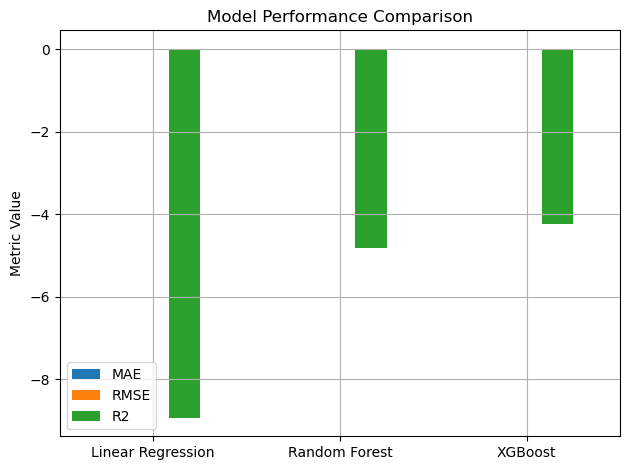

In [14]:
# Plottig Model Performance Comparison

plt.figure(figsize=(10, 6))
results_df[['MAE', 'RMSE', 'R2']].plot(kind='bar', rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.tight_layout()
plt.grid(True)
plt.savefig("model_performance_comparison.png")
plt.show()


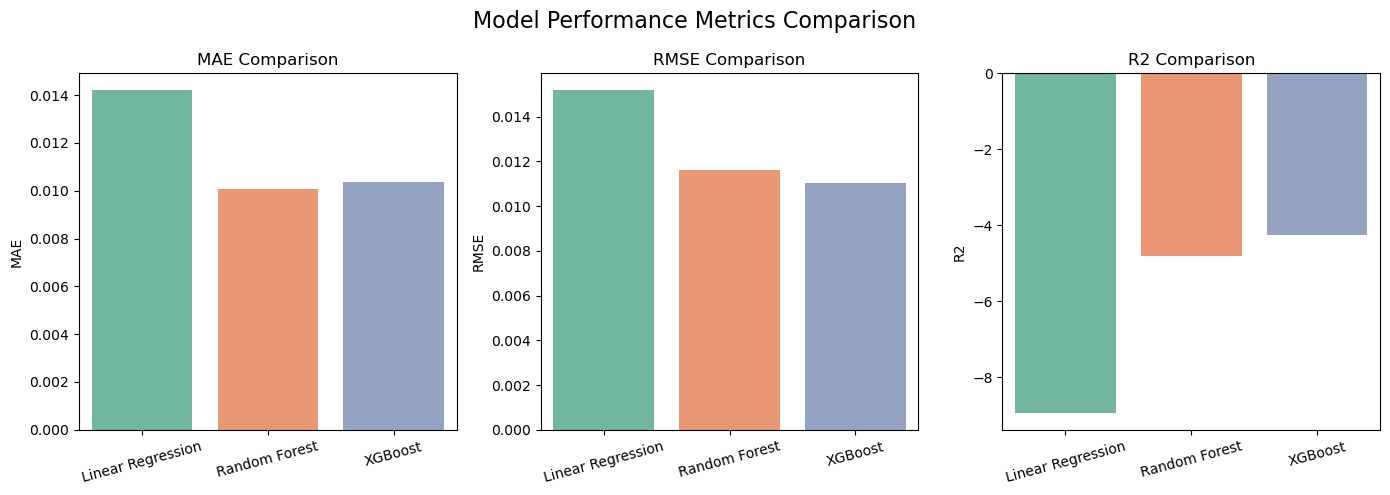

In [17]:
# Plotting bar charts for each metric
palette_name = 'Set2'  

plt.figure(figsize=(14, 5))
metrics = ['MAE', 'RMSE', 'R2']

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=results_df.index, y=results_df[metric], palette=palette_name)
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xticks(rotation=15)

plt.suptitle("Model Performance Metrics Comparison", fontsize=16)
plt.tight_layout()
plt.show()

Visualizing the XGBoost model predicted SoH by plotting actual values against predicted ones.

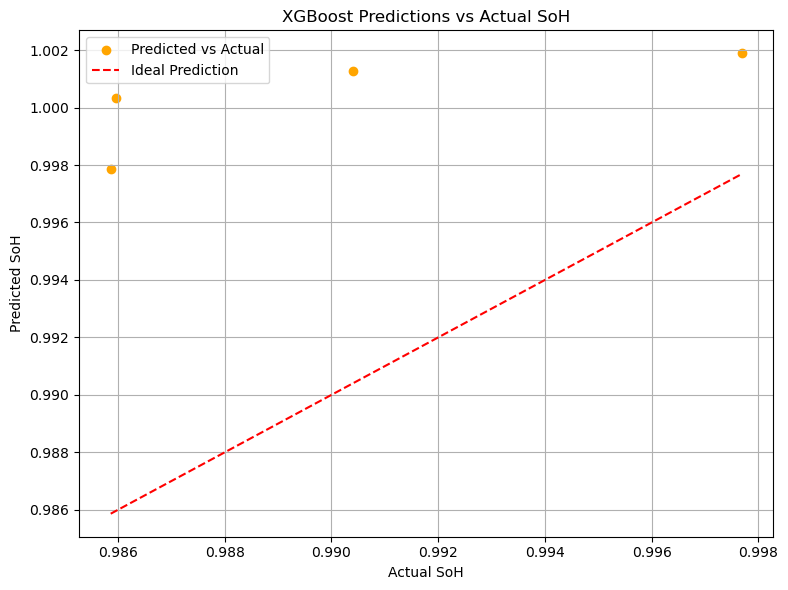

In [15]:
# Plotting predicted vs actual SoH using XGBoost
import matplotlib.pyplot as plt
import numpy as np

# Predict using the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='orange', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction')
plt.xlabel('Actual SoH')
plt.ylabel('Predicted SoH')
plt.title('XGBoost Predictions vs Actual SoH')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()